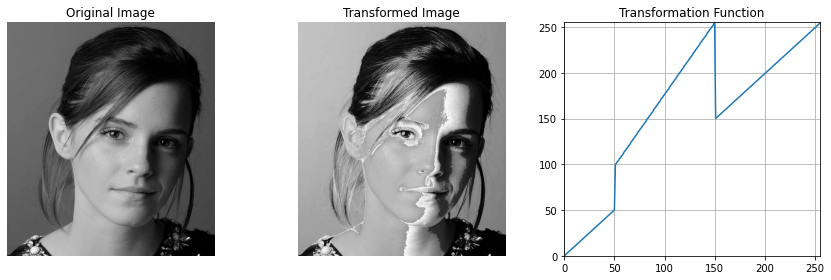

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

c = np.array([(50, 50), (50, 100), (150, 255), (150, 150)])

t1 = np.linspace(0, c[0, 1], c[0, 0] + 1).astype('uint8')   
t2 = np.linspace(c[0, 1], c[1, 1], c[1, 0] - c[0, 0]).astype('uint8') 
t3 = np.linspace(c[1, 1], c[2, 1], c[2, 0] - c[1, 0]).astype('uint8')  
t4 = np.linspace(c[2, 1], c[3, 1], c[3, 0] - c[2, 0]).astype('uint8')  
t5 = np.linspace(c[3, 1], 255, 255 - c[3, 0]).astype('uint8')  

transform = np.concatenate((t1, t2, t3, t4, t5))

f = cv.imread('a1images\emma.jpg', cv.IMREAD_GRAYSCALE)  

# Apply the transformation
g = transform[f]
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

ax[0].imshow(f, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(g, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Transformed Image')
ax[1].axis('off')

ax[2].plot(transform)
ax[2].set_ylim([0, 255])
ax[2].set_xlim([0, 255])
ax[2].set_title('Transformation Function')
ax[2].grid(True) 

plt.tight_layout()
plt.show()


Checking intensities for white matter:
Pixel at (120, 120) has intensity: 182

Checking intensities for gray matter:
Pixel at (145, 95) has intensity: 215


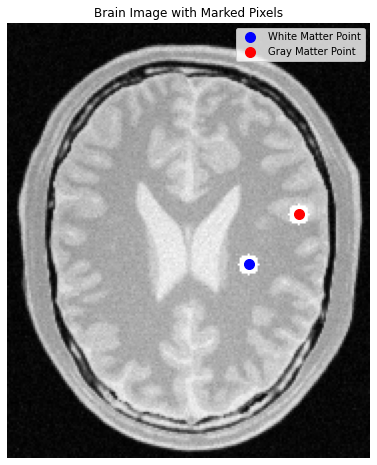

In [17]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the brain proton density image in grayscale
image_path = r'D:\EN3166-Image-processing-and-machine-vision\EN3166-Image-processing-and-machine-vision\Image processing assignment\a1images\brain_proton_density_slice.png'
image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

# Check if the image was loaded successfully
if image is None:
    print(f"Error: Could not load image from path '{image_path}'. Please check the file path.")
else:
    # Function to print pixel intensity at specified coordinates
    def get_pixel_intensity(img, coordinates):
        intensities = []
        for coord in coordinates:
            x, y = coord
            intensity = img[y, x]  # Access the pixel value at (x, y)
            intensities.append((coord, intensity))
            print(f'Pixel at ({x}, {y}) has intensity: {intensity}')
            # Mark the pixel on the image (for visualization)
            cv.circle(img, (x, y), 5, (255, 0, 0), -1)  # Mark the pixel with a blue dot
        return intensities

    # Specify the coordinates for white matter and gray matter
    # Replace these with the actual coordinates you want to check
    white_matter_coords = [(120, 120)]  # Example coordinates for white matter
    gray_matter_coords = [(145, 95)]     # Example coordinates for gray matter

    # Get intensities
    print("Checking intensities for white matter:")
    white_matter_intensities = get_pixel_intensity(image, white_matter_coords)

    print("\nChecking intensities for gray matter:")
    gray_matter_intensities = get_pixel_intensity(image, gray_matter_coords)

    # Display the image with marked pixels
    plt.figure(figsize=(8, 8))
    plt.imshow(image, cmap='gray', vmin=0, vmax=255)
    plt.title('Brain Image with Marked Pixels')
    plt.scatter(*zip(*white_matter_coords), color='blue', s=100, label='White Matter Point')  # Mark white matter point
    plt.scatter(*zip(*gray_matter_coords), color='red', s=100, label='Gray Matter Point')   # Mark gray matter point
    plt.legend()
    plt.axis('off')  # Hide axes
    plt.show()


White Matter Intensity: 166, Range: (154, 177)
Gray Matter Intensity: 215, Range: (199, 230)


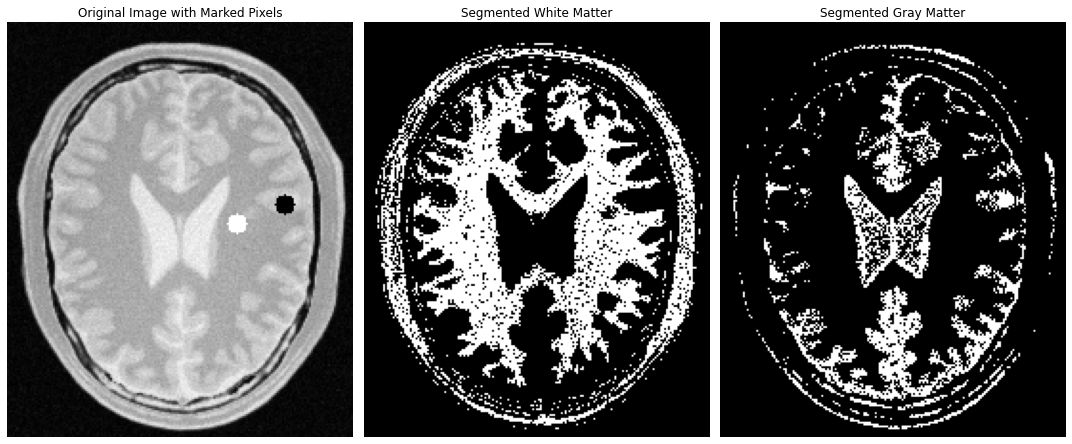

In [30]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the brain proton density image in grayscale
image_path = r'D:\EN3166-Image-processing-and-machine-vision\EN3166-Image-processing-and-machine-vision\Image processing assignment\a1images\brain_proton_density_slice.png'
image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

# Check if the image was loaded successfully
if image is None:
    print(f"Error: Could not load image from path '{image_path}'. Please check the file path.")
else:
    # Specify the coordinates for white matter and gray matter
    white_matter_coords = [(120, 105)]  # Example coordinates for white matter
    gray_matter_coords = [(145, 95)]     # Example coordinates for gray matter

    # Define the percentage range for intensity
    range_percent = 7  # You can adjust this value

    # Function to calculate the intensity range
    def calculate_intensity_range(intensity):
        lower_bound = int(intensity - (intensity * range_percent / 100))
        upper_bound = int(intensity + (intensity * range_percent / 100))
        return lower_bound, upper_bound

    # Get pixel intensities and calculate ranges
    white_matter_intensity = image[white_matter_coords[0][1], white_matter_coords[0][0]]
    gray_matter_intensity = image[gray_matter_coords[0][1], gray_matter_coords[0][0]]

    white_range = calculate_intensity_range(white_matter_intensity)
    gray_range = calculate_intensity_range(gray_matter_intensity)

    print(f'White Matter Intensity: {white_matter_intensity}, Range: {white_range}')
    print(f'Gray Matter Intensity: {gray_matter_intensity}, Range: {gray_range}')

    # Create segmented images
    white_mask = (image >= white_range[0]) & (image <= white_range[1])
    gray_mask = (image >= gray_range[0]) & (image <= gray_range[1])

    segmented_white = np.zeros_like(image)
    segmented_white[white_mask] = 255  # Highlight the white matter region

    segmented_gray = np.zeros_like(image)
    segmented_gray[gray_mask] = 255  # Highlight the gray matter region

    # Mark the pixels on the original image for visualization
    cv.circle(image, white_matter_coords[0], 5, (255, 0, 0), -1)  # Mark white matter pixel with a red dot
    cv.circle(image, gray_matter_coords[0], 5, (0, 0, 255), -1)   # Mark gray matter pixel with a blue dot

    # Display the images
    plt.figure(figsize=(15, 8))

    # Display original image with marked pixels
    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap='gray', vmin=0, vmax=255)
    plt.title('Original Image with Marked Pixels')
    plt.axis('off')

    # Display segmented white matter image
    plt.subplot(1, 3, 2)
    plt.imshow(segmented_white, cmap='gray', vmin=0, vmax=255)
    plt.title('Segmented White Matter')
    plt.axis('off')

    # Display segmented gray matter image
    plt.subplot(1, 3, 3)
    plt.imshow(segmented_gray, cmap='gray', vmin=0, vmax=255)
    plt.title('Segmented Gray Matter')
    plt.axis('off')

    plt.tight_layout()
    plt.show()


White Matter Intensity: 166, Range: (154, 177)
Gray Matter Intensity: 215, Range: (199, 230)
Exclude Intensity: 231, Range: (214, 247)


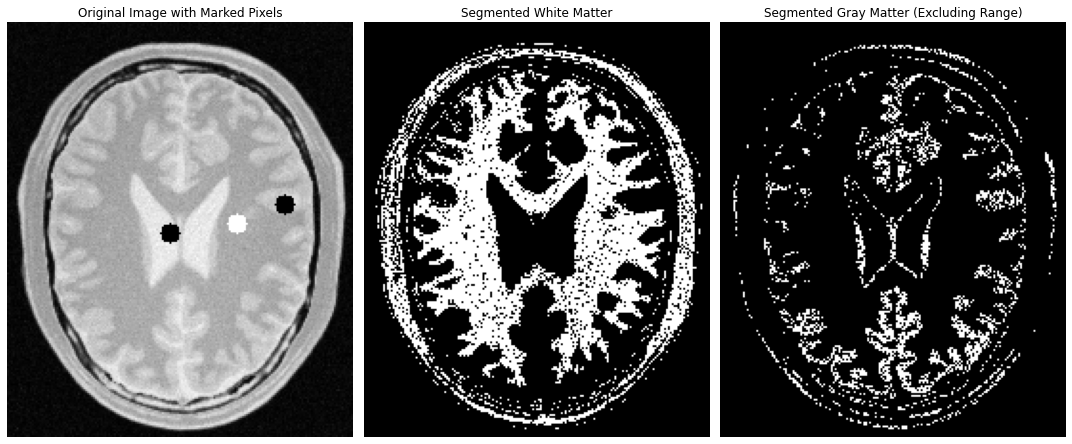

In [33]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the brain proton density image in grayscale
image_path = r'D:\EN3166-Image-processing-and-machine-vision\EN3166-Image-processing-and-machine-vision\Image processing assignment\a1images\brain_proton_density_slice.png'
image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

# Check if the image was loaded successfully
if image is None:
    print(f"Error: Could not load image from path '{image_path}'. Please check the file path.")
else:
    # Specify the coordinates for white matter and gray matter
    white_matter_coords = [(120, 105)]  # Example coordinates for white matter
    gray_matter_coords = [(145, 95)]     # Example coordinates for gray matter
    exclude_gray_coords = [(85, 110)]   # New coordinates to exclude from gray matter (change as needed)

    # Define the percentage range for intensity
    range_percent = 7  # You can adjust this value

    # Function to calculate the intensity range
    def calculate_intensity_range(intensity):
        lower_bound = int(intensity - (intensity * range_percent / 100))
        upper_bound = int(intensity + (intensity * range_percent / 100))
        return lower_bound, upper_bound

    # Get pixel intensities and calculate ranges
    white_matter_intensity = image[white_matter_coords[0][1], white_matter_coords[0][0]]
    gray_matter_intensity = image[gray_matter_coords[0][1], gray_matter_coords[0][0]]
    exclude_gray_intensity = image[exclude_gray_coords[0][1], exclude_gray_coords[0][0]]

    white_range = calculate_intensity_range(white_matter_intensity)
    gray_range = calculate_intensity_range(gray_matter_intensity)
    exclude_gray_range = calculate_intensity_range(exclude_gray_intensity)

    print(f'White Matter Intensity: {white_matter_intensity}, Range: {white_range}')
    print(f'Gray Matter Intensity: {gray_matter_intensity}, Range: {gray_range}')
    print(f'Exclude Intensity: {exclude_gray_intensity}, Range: {exclude_gray_range}')

    # Create segmented images
    white_mask = (image >= white_range[0]) & (image <= white_range[1])
    gray_mask = (image >= gray_range[0]) & (image <= gray_range[1])
    exclude_mask = (image >= exclude_gray_range[0]) & (image <= exclude_gray_range[1])

    # Apply the masks
    segmented_white = np.zeros_like(image)
    segmented_white[white_mask] = 255  # Highlight the white matter region

    segmented_gray = np.zeros_like(image)
    segmented_gray[gray_mask] = 255  # Highlight the gray matter region

    # Remove the excluded range from the segmented gray matter
    segmented_gray[exclude_mask] = 0  # Set excluded area to black

    # Mark the pixels on the original image for visualization
    cv.circle(image, white_matter_coords[0], 5, (255, 0, 0), -1)  # Mark white matter pixel with a red dot
    cv.circle(image, gray_matter_coords[0], 5, (0, 0, 255), -1)   # Mark gray matter pixel with a blue dot
    cv.circle(image, exclude_gray_coords[0], 5, (0, 255, 0), -1)  # Mark excluded gray matter pixel with a green dot

    # Display the images
    plt.figure(figsize=(15, 8))

    # Display original image with marked pixels
    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap='gray', vmin=0, vmax=255)
    plt.title('Original Image with Marked Pixels')
    plt.axis('off')

    # Display segmented white matter image
    plt.subplot(1, 3, 2)
    plt.imshow(segmented_white, cmap='gray', vmin=0, vmax=255)
    plt.title('Segmented White Matter')
    plt.axis('off')

    # Display segmented gray matter image
    plt.subplot(1, 3, 3)
    plt.imshow(segmented_gray, cmap='gray', vmin=0, vmax=255)
    plt.title('Segmented Gray Matter (Excluding Range)')
    plt.axis('off')

    plt.tight_layout()
    plt.show()


White Matter Intensity: 166, Range: (154, 177)
Gray Matter Intensity: 215, Range: (199, 230)
Exclude Intensity: 231, Range: (214, 247)


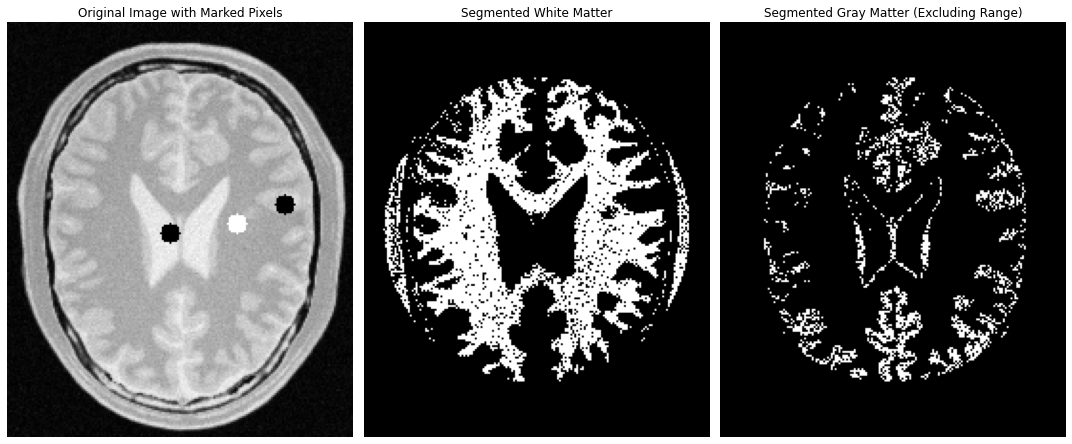

In [35]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the brain proton density image in grayscale
image_path = r'D:\EN3166-Image-processing-and-machine-vision\EN3166-Image-processing-and-machine-vision\Image processing assignment\a1images\brain_proton_density_slice.png'
image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

# Check if the image was loaded successfully
if image is None:
    print(f"Error: Could not load image from path '{image_path}'. Please check the file path.")
else:
    # Specify the coordinates for white matter and gray matter
    white_matter_coords = [(120, 105)]  # Example coordinates for white matter
    gray_matter_coords = [(145, 95)]     # Example coordinates for gray matter
    exclude_gray_coords =  [(85, 110)]  # New coordinates to exclude from gray matter

    # Define the percentage range for intensity
    range_percent = 7  # You can adjust this value

    # Function to calculate the intensity range
    def calculate_intensity_range(intensity):
        lower_bound = int(intensity - (intensity * range_percent / 100))
        upper_bound = int(intensity + (intensity * range_percent / 100))
        return lower_bound, upper_bound

    # Get pixel intensities and calculate ranges
    white_matter_intensity = image[white_matter_coords[0][1], white_matter_coords[0][0]]
    gray_matter_intensity = image[gray_matter_coords[0][1], gray_matter_coords[0][0]]
    exclude_gray_intensity = image[exclude_gray_coords[0][1], exclude_gray_coords[0][0]]

    white_range = calculate_intensity_range(white_matter_intensity)
    gray_range = calculate_intensity_range(gray_matter_intensity)
    exclude_gray_range = calculate_intensity_range(exclude_gray_intensity)

    print(f'White Matter Intensity: {white_matter_intensity}, Range: {white_range}')
    print(f'Gray Matter Intensity: {gray_matter_intensity}, Range: {gray_range}')
    print(f'Exclude Intensity: {exclude_gray_intensity}, Range: {exclude_gray_range}')

    # Create masks
    white_mask = (image >= white_range[0]) & (image <= white_range[1])
    gray_mask = (image >= gray_range[0]) & (image <= gray_range[1])
    exclude_mask = (image >= exclude_gray_range[0]) & (image <= exclude_gray_range[1])

    # Create segmented images
    segmented_white = np.zeros_like(image)
    segmented_white[white_mask] = 255  # Highlight the white matter region

    segmented_gray = np.zeros_like(image)
    segmented_gray[gray_mask] = 255  # Highlight the gray matter region
    segmented_gray[exclude_mask] = 0  # Set excluded area to black

    # Create a circular mask to remove the edges
    mask = np.zeros(image.shape, dtype=np.uint8)
    center = (image.shape[1] // 2, image.shape[0] // 2)  # Center of the image
    radius = min(center) - 10  # Adjust radius as needed
    cv.circle(mask, center, radius, 255, thickness=-1)  # Create a filled circle

    # Apply the circular mask to the segmented images
    segmented_white = cv.bitwise_and(segmented_white, segmented_white, mask=mask)
    segmented_gray = cv.bitwise_and(segmented_gray, segmented_gray, mask=mask)

    # Mark the pixels on the original image for visualization
    cv.circle(image, white_matter_coords[0], 5, (255, 0, 0), -1)  # Mark white matter pixel with a red dot
    cv.circle(image, gray_matter_coords[0], 5, (0, 0, 255), -1)   # Mark gray matter pixel with a blue dot
    cv.circle(image, exclude_gray_coords[0], 5, (0, 255, 0), -1)  # Mark excluded gray matter pixel with a green dot

    # Display the images
    plt.figure(figsize=(15, 8))

    # Display original image with marked pixels
    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap='gray', vmin=0, vmax=255)
    plt.title('Original Image with Marked Pixels')
    plt.axis('off')

    # Display segmented white matter image
    plt.subplot(1, 3, 2)
    plt.imshow(segmented_white, cmap='gray', vmin=0, vmax=255)
    plt.title('Segmented White Matter')
    plt.axis('off')

    # Display segmented gray matter image
    plt.subplot(1, 3, 3)
    plt.imshow(segmented_gray, cmap='gray', vmin=0, vmax=255)
    plt.title('Segmented Gray Matter (Excluding Range)')
    plt.axis('off')

    plt.tight_layout()
    plt.show()


White Matter Intensity: 166, Range: (154, 177)
Gray Matter Intensity: 215, Range: (199, 230)
Exclude Intensity: 231, Range: (214, 247)


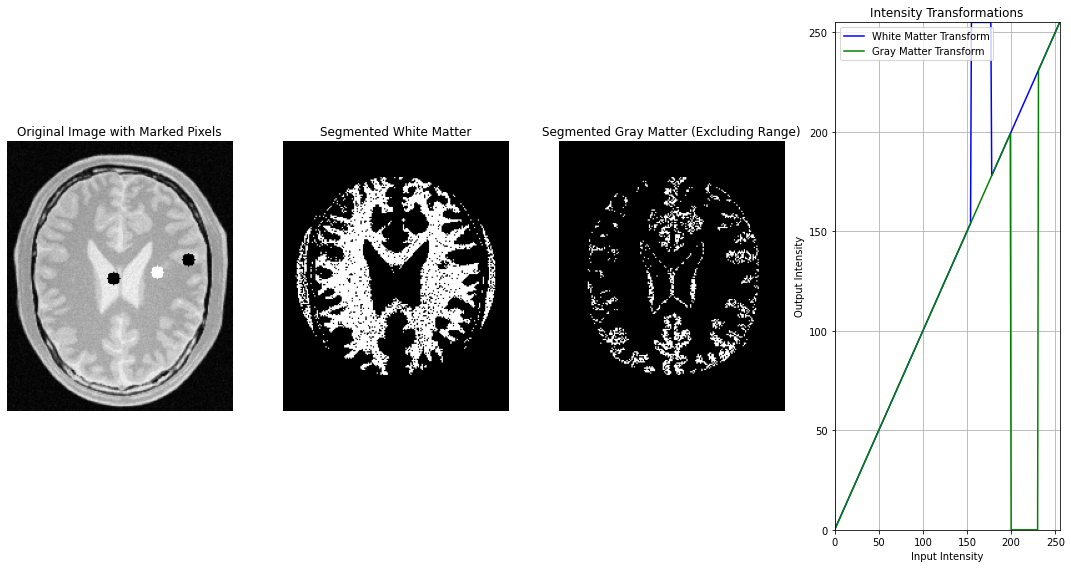

In [37]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the brain proton density image in grayscale
image_path = r'D:\EN3166-Image-processing-and-machine-vision\EN3166-Image-processing-and-machine-vision\Image processing assignment\a1images\brain_proton_density_slice.png'
image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

# Check if the image was loaded successfully
if image is None:
    print(f"Error: Could not load image from path '{image_path}'. Please check the file path.")
else:
    # Specify the coordinates for white matter and gray matter
    white_matter_coords = [(120, 105)]  # Example coordinates for white matter
    gray_matter_coords = [(145, 95)]     # Example coordinates for gray matter
    exclude_gray_coords = [(85, 110)]    # New coordinates to exclude from gray matter

    # Define the percentage range for intensity
    range_percent = 7  # You can adjust this value

    # Function to calculate the intensity range
    def calculate_intensity_range(intensity):
        lower_bound = int(intensity - (intensity * range_percent / 100))
        upper_bound = int(intensity + (intensity * range_percent / 100))
        return lower_bound, upper_bound

    # Get pixel intensities and calculate ranges
    white_matter_intensity = image[white_matter_coords[0][1], white_matter_coords[0][0]]
    gray_matter_intensity = image[gray_matter_coords[0][1], gray_matter_coords[0][0]]
    exclude_gray_intensity = image[exclude_gray_coords[0][1], exclude_gray_coords[0][0]]

    white_range = calculate_intensity_range(white_matter_intensity)
    gray_range = calculate_intensity_range(gray_matter_intensity)
    exclude_gray_range = calculate_intensity_range(exclude_gray_intensity)

    print(f'White Matter Intensity: {white_matter_intensity}, Range: {white_range}')
    print(f'Gray Matter Intensity: {gray_matter_intensity}, Range: {gray_range}')
    print(f'Exclude Intensity: {exclude_gray_intensity}, Range: {exclude_gray_range}')

    # Create masks
    white_mask = (image >= white_range[0]) & (image <= white_range[1])
    gray_mask = (image >= gray_range[0]) & (image <= gray_range[1])
    exclude_mask = (image >= exclude_gray_range[0]) & (image <= exclude_gray_range[1])

    # Create segmented images
    segmented_white = np.zeros_like(image)
    segmented_white[white_mask] = 255  # Highlight the white matter region

    segmented_gray = np.zeros_like(image)
    segmented_gray[gray_mask] = 255  # Highlight the gray matter region
    segmented_gray[exclude_mask] = 0  # Set excluded area to black

    # Create a circular mask to remove the edges
    mask = np.zeros(image.shape, dtype=np.uint8)
    center = (image.shape[1] // 2, image.shape[0] // 2)  # Center of the image
    radius = min(center) - 10  # Adjust radius as needed
    cv.circle(mask, center, radius, 255, thickness=-1)  # Create a filled circle

    # Apply the circular mask to the segmented images
    segmented_white = cv.bitwise_and(segmented_white, segmented_white, mask=mask)
    segmented_gray = cv.bitwise_and(segmented_gray, segmented_gray, mask=mask)

    # Mark the pixels on the original image for visualization
    cv.circle(image, white_matter_coords[0], 5, (255, 0, 0), -1)  # Mark white matter pixel with a red dot
    cv.circle(image, gray_matter_coords[0], 5, (0, 0, 255), -1)   # Mark gray matter pixel with a blue dot
    cv.circle(image, exclude_gray_coords[0], 5, (0, 255, 0), -1)  # Mark excluded gray matter pixel with a green dot

    # Display the original image with marked pixels
    plt.figure(figsize=(15, 8))
    plt.subplot(1, 4, 1)
    plt.imshow(image, cmap='gray', vmin=0, vmax=255)
    plt.title('Original Image with Marked Pixels')
    plt.axis('off')

    # Display segmented white matter image
    plt.subplot(1, 4, 2)
    plt.imshow(segmented_white, cmap='gray', vmin=0, vmax=255)
    plt.title('Segmented White Matter')
    plt.axis('off')

    # Display segmented gray matter image
    plt.subplot(1, 4, 3)
    plt.imshow(segmented_gray, cmap='gray', vmin=0, vmax=255)
    plt.title('Segmented Gray Matter (Excluding Range)')
    plt.axis('off')

    # Intensity transformation for white matter
    white_transform = np.zeros(256, dtype=np.uint8)
    for i in range(256):
        if i <= white_range[0]:
            white_transform[i] = i  # Identity for low values
        elif i <= white_range[1]:
            white_transform[i] = 255  # Max for the white matter range
        else:
            white_transform[i] = i  # Identity for high values

    # Intensity transformation for gray matter
    gray_transform = np.zeros(256, dtype=np.uint8)
    for i in range(256):
        if i <= gray_range[0]:
            gray_transform[i] = i  # Identity for low values
        elif i <= gray_range[1]:
            gray_transform[i] = 0  # Set to 0 for gray matter range (optional)
        else:
            gray_transform[i] = i  # Identity for high values

    # Plot intensity transformation functions
    plt.subplot(1, 4, 4)
    plt.plot(white_transform, label='White Matter Transform', color='blue')
    plt.plot(gray_transform, label='Gray Matter Transform', color='green')
    plt.title('Intensity Transformations')
    plt.xlabel('Input Intensity')
    plt.ylabel('Output Intensity')
    plt.xlim(0, 255)
    plt.ylim(0, 255)
    plt.grid()
    plt.legend()

    plt.tight_layout()
    plt.show()


White Matter Intensity: 166, Range: (154, 177)
Gray Matter Intensity: 215, Range: (199, 230)
Exclude Intensity: 231, Range: (214, 247)


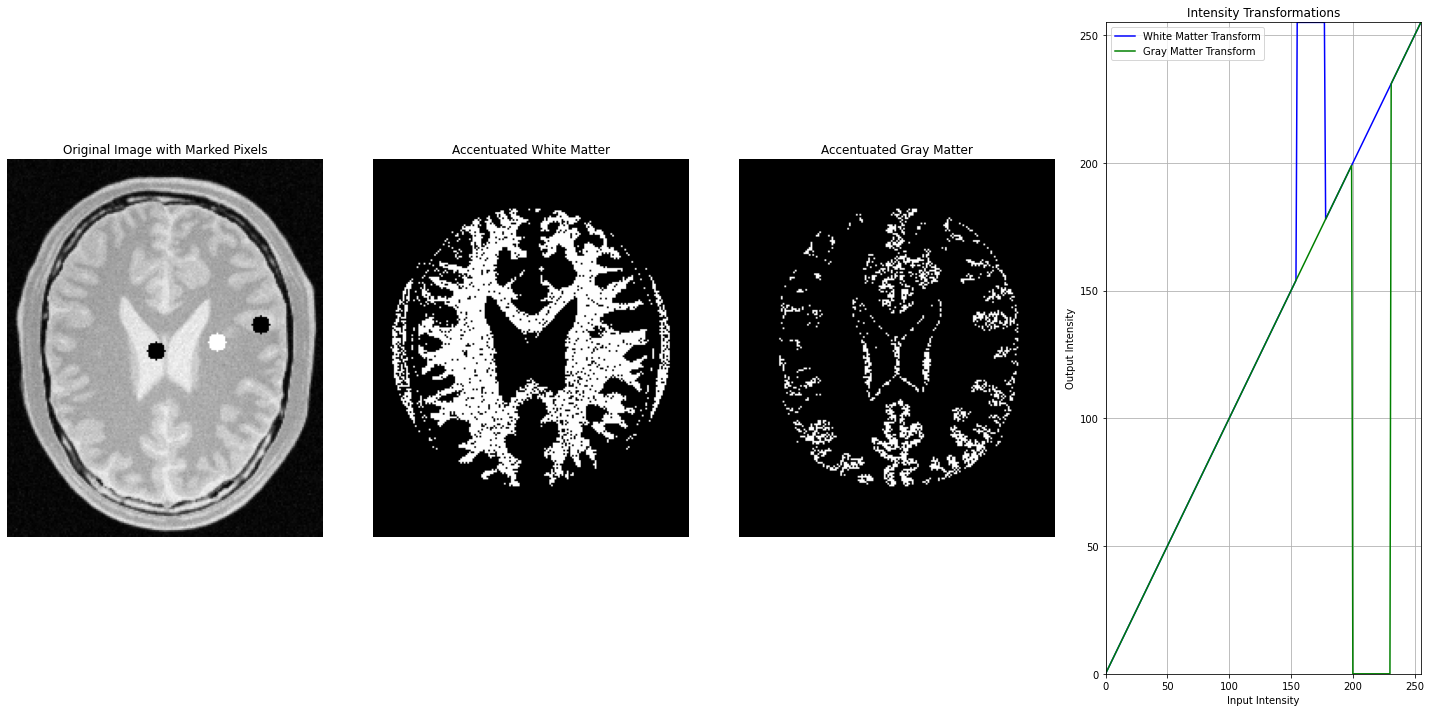

In [38]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the brain proton density image in grayscale
image_path = r'D:\EN3166-Image-processing-and-machine-vision\EN3166-Image-processing-and-machine-vision\Image processing assignment\a1images\brain_proton_density_slice.png'
image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

# Check if the image was loaded successfully
if image is None:
    print(f"Error: Could not load image from path '{image_path}'. Please check the file path.")
else:
    # Specify the coordinates for white matter and gray matter
    white_matter_coords = [(120, 105)]  # Example coordinates for white matter
    gray_matter_coords = [(145, 95)]     # Example coordinates for gray matter
    exclude_gray_coords =  [(85, 110)]   # New coordinates to exclude from gray matter

    # Define the percentage range for intensity
    range_percent = 7  # You can adjust this value

    # Function to calculate the intensity range
    def calculate_intensity_range(intensity):
        lower_bound = int(intensity - (intensity * range_percent / 100))
        upper_bound = int(intensity + (intensity * range_percent / 100))
        return lower_bound, upper_bound

    # Get pixel intensities and calculate ranges
    white_matter_intensity = image[white_matter_coords[0][1], white_matter_coords[0][0]]
    gray_matter_intensity = image[gray_matter_coords[0][1], gray_matter_coords[0][0]]
    exclude_gray_intensity = image[exclude_gray_coords[0][1], exclude_gray_coords[0][0]]

    white_range = calculate_intensity_range(white_matter_intensity)
    gray_range = calculate_intensity_range(gray_matter_intensity)
    exclude_gray_range = calculate_intensity_range(exclude_gray_intensity)

    print(f'White Matter Intensity: {white_matter_intensity}, Range: {white_range}')
    print(f'Gray Matter Intensity: {gray_matter_intensity}, Range: {gray_range}')
    print(f'Exclude Intensity: {exclude_gray_intensity}, Range: {exclude_gray_range}')

    # Create masks
    white_mask = (image >= white_range[0]) & (image <= white_range[1])
    gray_mask = (image >= gray_range[0]) & (image <= gray_range[1])
    exclude_mask = (image >= exclude_gray_range[0]) & (image <= exclude_gray_range[1])

    # Create segmented images
    segmented_white = np.zeros_like(image)
    segmented_white[white_mask] = 255  # Highlight the white matter region

    segmented_gray = np.zeros_like(image)
    segmented_gray[gray_mask] = 255  # Highlight the gray matter region
    segmented_gray[exclude_mask] = 0  # Set excluded area to black

    # Create a circular mask to remove the edges
    mask = np.zeros(image.shape, dtype=np.uint8)
    center = (image.shape[1] // 2, image.shape[0] // 2)  # Center of the image
    radius = min(center) - 10  # Adjust radius as needed
    cv.circle(mask, center, radius, 255, thickness=-1)  # Create a filled circle

    # Apply the circular mask to the segmented images
    segmented_white = cv.bitwise_and(segmented_white, segmented_white, mask=mask)
    segmented_gray = cv.bitwise_and(segmented_gray, segmented_gray, mask=mask)

    # Accentuate white matter
    transformed_white = np.clip(segmented_white * 2, 0, 255).astype(np.uint8)  # Enhance the white matter

    # Accentuate gray matter
    transformed_gray = np.clip(segmented_gray * 2, 0, 255).astype(np.uint8)  # Enhance the gray matter

    # Mark the pixels on the original image for visualization
    cv.circle(image, white_matter_coords[0], 5, (255, 0, 0), -1)  # Mark white matter pixel with a red dot
    cv.circle(image, gray_matter_coords[0], 5, (0, 0, 255), -1)   # Mark gray matter pixel with a blue dot
    cv.circle(image, exclude_gray_coords[0], 5, (0, 255, 0), -1)  # Mark excluded gray matter pixel with a green dot

    # Display the images
    plt.figure(figsize=(20, 10))

    # Display original image with marked pixels
    plt.subplot(1, 4, 1)
    plt.imshow(image, cmap='gray', vmin=0, vmax=255)
    plt.title('Original Image with Marked Pixels')
    plt.axis('off')

    # Display transformed white matter image
    plt.subplot(1, 4, 2)
    plt.imshow(transformed_white, cmap='gray', vmin=0, vmax=255)
    plt.title('Accentuated White Matter')
    plt.axis('off')

    # Display transformed gray matter image
    plt.subplot(1, 4, 3)
    plt.imshow(transformed_gray, cmap='gray', vmin=0, vmax=255)
    plt.title('Accentuated Gray Matter')
    plt.axis('off')

    # Intensity transformation function graph
    plt.subplot(1, 4, 4)
    # Define the transformation for white matter
    t_white = np.zeros(256, dtype=np.uint8)
    for i in range(256):
        if i <= white_range[0]:
            t_white[i] = i  # Identity for low values
        elif i <= white_range[1]:
            t_white[i] = 255  # Max for the white matter range
        else:
            t_white[i] = i  # Identity for high values

    # Define the transformation for gray matter
    t_gray = np.zeros(256, dtype=np.uint8)
    for i in range(256):
        if i <= gray_range[0]:
            t_gray[i] = i  # Identity for low values
        elif i <= gray_range[1]:
            t_gray[i] = 0  # Set to 0 for gray matter range (optional)
        else:
            t_gray[i] = i  # Identity for high values

    plt.plot(t_white, label='White Matter Transform', color='blue')
    plt.plot(t_gray, label='Gray Matter Transform', color='green')
    plt.title('Intensity Transformations')
    plt.xlabel('Input Intensity')
    plt.ylabel('Output Intensity')
    plt.xlim(0, 255)
    plt.ylim(0, 255)
    plt.grid()
    plt.legend()

    plt.tight_layout()
    plt.show()


White Matter Intensity: 166, Range: (154, 177)
Gray Matter Intensity: 215, Range: (199, 230)
Exclude Intensity: 231, Range: (214, 247)


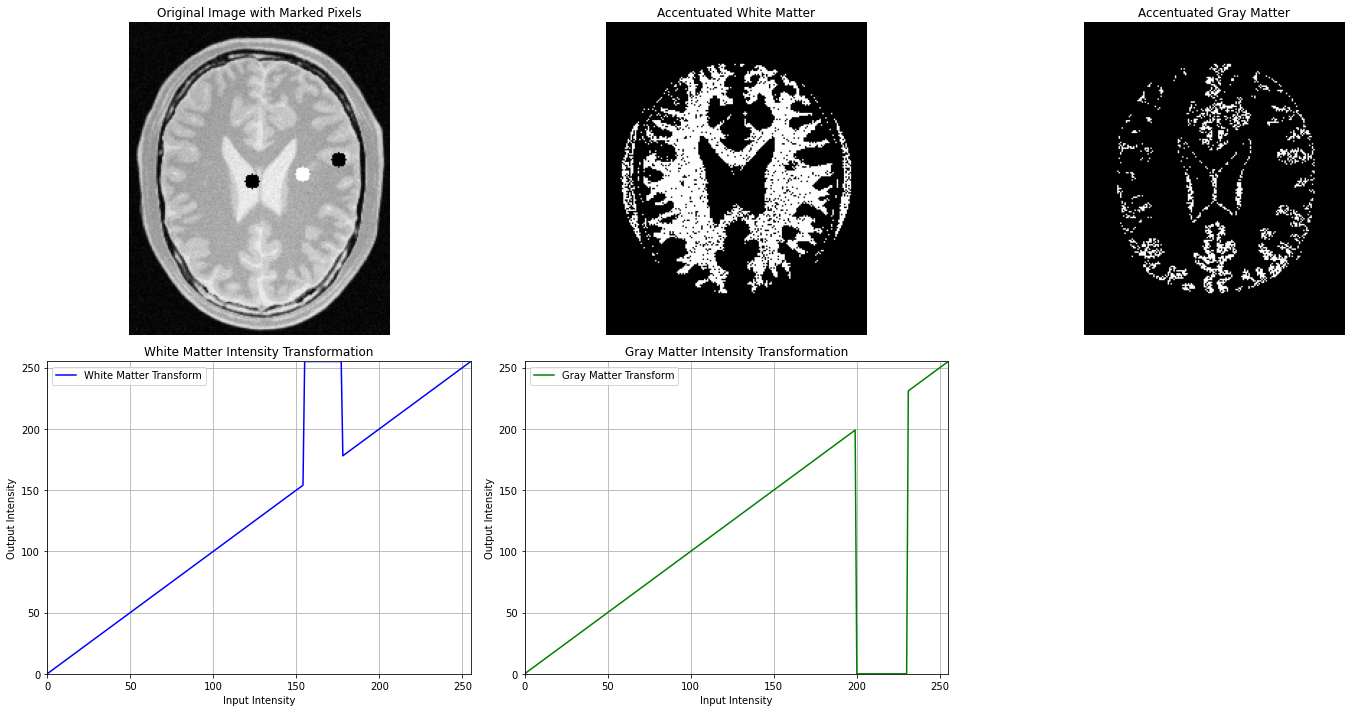

In [43]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the brain proton density image in grayscale
image_path = r'D:\EN3166-Image-processing-and-machine-vision\EN3166-Image-processing-and-machine-vision\Image processing assignment\a1images\brain_proton_density_slice.png'
image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

# Check if the image was loaded successfully
if image is None:
    print(f"Error: Could not load image from path '{image_path}'. Please check the file path.")
else:
    # Specify the coordinates for white matter and gray matter
    white_matter_coords = [(120, 105)]  # Example coordinates for white matter
    gray_matter_coords = [(145, 95)]     # Example coordinates for gray matter
    exclude_gray_coords =  [(85, 110)]   # New coordinates to exclude from gray matter

    # Define the percentage range for intensity
    range_percent = 7  # You can adjust this value

    # Function to calculate the intensity range
    def calculate_intensity_range(intensity):
        lower_bound = int(intensity - (intensity * range_percent / 100))
        upper_bound = int(intensity + (intensity * range_percent / 100))
        return lower_bound, upper_bound

    # Get pixel intensities and calculate ranges
    white_matter_intensity = image[white_matter_coords[0][1], white_matter_coords[0][0]]
    gray_matter_intensity = image[gray_matter_coords[0][1], gray_matter_coords[0][0]]
    exclude_gray_intensity = image[exclude_gray_coords[0][1], exclude_gray_coords[0][0]]

    white_range = calculate_intensity_range(white_matter_intensity)
    gray_range = calculate_intensity_range(gray_matter_intensity)
    exclude_gray_range = calculate_intensity_range(exclude_gray_intensity)

    print(f'White Matter Intensity: {white_matter_intensity}, Range: {white_range}')
    print(f'Gray Matter Intensity: {gray_matter_intensity}, Range: {gray_range}')
    print(f'Exclude Intensity: {exclude_gray_intensity}, Range: {exclude_gray_range}')

    # Create masks
    white_mask = (image >= white_range[0]) & (image <= white_range[1])
    gray_mask = (image >= gray_range[0]) & (image <= gray_range[1])
    exclude_mask = (image >= exclude_gray_range[0]) & (image <= exclude_gray_range[1])

    # Create segmented images
    segmented_white = np.zeros_like(image)
    segmented_white[white_mask] = 255  # Highlight the white matter region

    segmented_gray = np.zeros_like(image)
    segmented_gray[gray_mask] = 255  # Highlight the gray matter region
    segmented_gray[exclude_mask] = 0  # Set excluded area to black

    # Create a circular mask to remove the edges
    mask = np.zeros(image.shape, dtype=np.uint8)
    center = (image.shape[1] // 2, image.shape[0] // 2)  # Center of the image
    radius = min(center) - 10  # Adjust radius as needed
    cv.circle(mask, center, radius, 255, thickness=-1)  # Create a filled circle

    # Apply the circular mask to the segmented images
    segmented_white = cv.bitwise_and(segmented_white, segmented_white, mask=mask)
    segmented_gray = cv.bitwise_and(segmented_gray, segmented_gray, mask=mask)

    # Accentuate white matter
    transformed_white = np.clip(segmented_white * 2, 0, 255).astype(np.uint8)  # Enhance the white matter

    # Accentuate gray matter
    transformed_gray = np.clip(segmented_gray * 2, 0, 255).astype(np.uint8)  # Enhance the gray matter

    # Mark the pixels on the original image for visualization
    cv.circle(image, white_matter_coords[0], 5, (255, 0, 0), -1)  # Mark white matter pixel with a red dot
    cv.circle(image, gray_matter_coords[0], 5, (0, 0, 255), -1)   # Mark gray matter pixel with a blue dot
    cv.circle(image, exclude_gray_coords[0], 5, (0, 255, 0), -1)  # Mark excluded gray matter pixel with a green dot

    # Display the images
    plt.figure(figsize=(20, 10))

    # Display original image with marked pixels
    plt.subplot(2, 3, 1)
    plt.imshow(image, cmap='gray', vmin=0, vmax=255)
    plt.title('Original Image with Marked Pixels')
    plt.axis('off')

    # Display transformed white matter image
    plt.subplot(2, 3, 2)
    plt.imshow(transformed_white, cmap='gray', vmin=0, vmax=255)
    plt.title('Accentuated White Matter')
    plt.axis('off')

    # Display transformed gray matter image
    plt.subplot(2, 3, 3)
    plt.imshow(transformed_gray, cmap='gray', vmin=0, vmax=255)
    plt.title('Accentuated Gray Matter')
    plt.axis('off')

    # Intensity transformation function graph for white matter
    plt.subplot(2, 3, 4)
    t_white = np.zeros(256, dtype=np.uint8)
    for i in range(256):
        if i <= white_range[0]:
            t_white[i] = i  # Identity for low values
        elif i <= white_range[1]:
            t_white[i] = 255  # Max for the white matter range
        else:
            t_white[i] = i  # Identity for high values
    plt.plot(t_white, label='White Matter Transform', color='blue')
    plt.title('White Matter Intensity Transformation')
    plt.xlabel('Input Intensity')
    plt.ylabel('Output Intensity')
    plt.xlim(0, 255)
    plt.ylim(0, 255)
    plt.grid()
    plt.legend()

    # Intensity transformation function graph for gray matter
    plt.subplot(2, 3, 5)
    t_gray = np.zeros(256, dtype=np.uint8)
    for i in range(256):
        if i <= gray_range[0]:
            t_gray[i] = i  # Identity for low values
        elif i <= gray_range[1]:
            t_gray[i] = 0  # Set to 0 for gray matter range (optional)
        else:
            t_gray[i] = i  # Identity for high values
    plt.plot(t_gray, label='Gray Matter Transform', color='green')
    plt.title('Gray Matter Intensity Transformation')
    plt.xlabel('Input Intensity')
    plt.ylabel('Output Intensity')
    plt.xlim(0, 255)
    plt.ylim(0, 255)
    plt.grid()
    plt.legend()

    plt.tight_layout()
    plt.show()


White Matter Intensity: 166, Range: (154, 177)
Gray Matter Intensity: 215, Range: (199, 230)


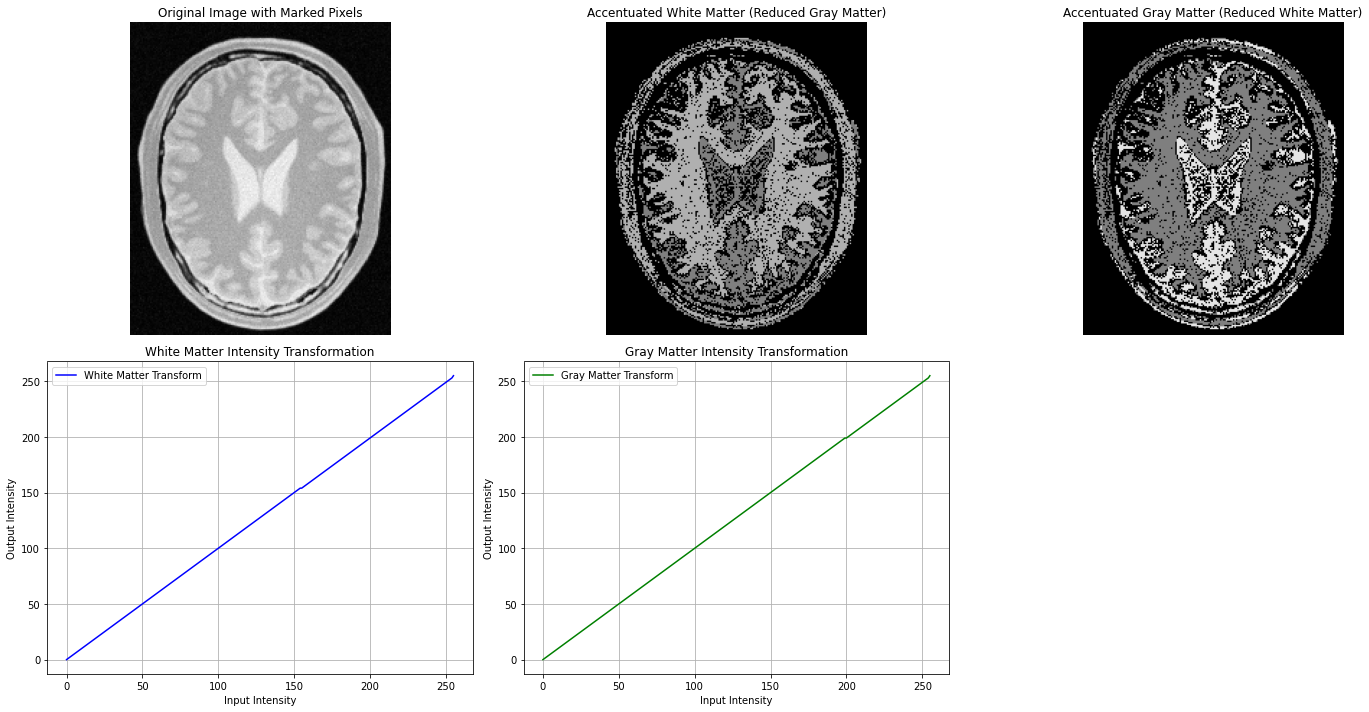

In [45]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the brain proton density image in grayscale
image_path = r'D:\EN3166-Image-processing-and-machine-vision\EN3166-Image-processing-and-machine-vision\Image processing assignment\a1images\brain_proton_density_slice.png'
image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

# Check if the image was loaded successfully
if image is None:
    print(f"Error: Could not load image from path '{image_path}'. Please check the file path.")
else:
    # Specify the coordinates for white matter and gray matter
    white_matter_coords = [(120, 105)]  # Example coordinates for white matter
    gray_matter_coords = [(145, 95)]    # Example coordinates for gray matter
    exclude_gray_coords = [(85, 110)]   # Example coordinates to exclude from gray matter

    # Define the percentage range for intensity
    range_percent = 7  # You can adjust this value

    # Function to calculate the intensity range
    def calculate_intensity_range(intensity):
        lower_bound = int(intensity - (intensity * range_percent / 100))
        upper_bound = int(intensity + (intensity * range_percent / 100))
        return lower_bound, upper_bound

    # Get pixel intensities and calculate ranges
    white_matter_intensity = image[white_matter_coords[0][1], white_matter_coords[0][0]]
    gray_matter_intensity = image[gray_matter_coords[0][1], gray_matter_coords[0][0]]
    exclude_gray_intensity = image[exclude_gray_coords[0][1], exclude_gray_coords[0][0]]

    white_range = calculate_intensity_range(white_matter_intensity)
    gray_range = calculate_intensity_range(gray_matter_intensity)

    print(f'White Matter Intensity: {white_matter_intensity}, Range: {white_range}')
    print(f'Gray Matter Intensity: {gray_matter_intensity}, Range: {gray_range}')

    # Create segmented images based on intensity ranges
    white_mask = (image >= white_range[0]) & (image <= white_range[1])
    gray_mask = (image >= gray_range[0]) & (image <= gray_range[1])

    # Initialize transformed images
    transformed_white = np.zeros_like(image)
    transformed_gray = np.zeros_like(image)

    # 2nd Image - Enhance white matter, reduce gray matter
    t1_white = np.linspace(0, white_range[0], white_range[0] + 1).astype('uint8')  # Linear increase
    t2_white = np.linspace(white_range[0], 255, 255 - white_range[0]).astype('uint8')  # Max out white matter

    transform_white = np.concatenate((t1_white, t2_white))

    # Apply transformation to white matter, decrease gray matter
    for i in range(256):
        if i in range(white_range[0], white_range[1] + 1):
            transformed_white[white_mask] = transform_white[i]
        else:
            transformed_white[gray_mask] = i // 2  # Reduce gray matter

    # 3rd Image - Enhance gray matter, reduce white matter
    t1_gray = np.linspace(0, gray_range[0], gray_range[0] + 1).astype('uint8')
    t2_gray = np.linspace(gray_range[0], 255, 255 - gray_range[0]).astype('uint8')

    transform_gray = np.concatenate((t1_gray, t2_gray))

    for i in range(256):
        if i in range(gray_range[0], gray_range[1] + 1):
            transformed_gray[gray_mask] = transform_gray[i]
        else:
            transformed_gray[white_mask] = i // 2  # Reduce white matter

    # Displaying images and transformation graphs
    plt.figure(figsize=(20, 10))

    # Original Image
    plt.subplot(2, 3, 1)
    plt.imshow(image, cmap='gray', vmin=0, vmax=255)
    plt.title('Original Image with Marked Pixels')
    plt.axis('off')

    # 2nd Image: Accentuated White Matter
    plt.subplot(2, 3, 2)
    plt.imshow(transformed_white, cmap='gray', vmin=0, vmax=255)
    plt.title('Accentuated White Matter (Reduced Gray Matter)')
    plt.axis('off')

    # 3rd Image: Accentuated Gray Matter
    plt.subplot(2, 3, 3)
    plt.imshow(transformed_gray, cmap='gray', vmin=0, vmax=255)
    plt.title('Accentuated Gray Matter (Reduced White Matter)')
    plt.axis('off')

    # White Matter Intensity Transformation
    plt.subplot(2, 3, 4)
    plt.plot(transform_white, label='White Matter Transform', color='blue')
    plt.title('White Matter Intensity Transformation')
    plt.xlabel('Input Intensity')
    plt.ylabel('Output Intensity')
    plt.grid()
    plt.legend()

    # Gray Matter Intensity Transformation
    plt.subplot(2, 3, 5)
    plt.plot(transform_gray, label='Gray Matter Transform', color='green')
    plt.title('Gray Matter Intensity Transformation')
    plt.xlabel('Input Intensity')
    plt.ylabel('Output Intensity')
    plt.grid()
    plt.legend()

    plt.tight_layout()
    plt.show()


White Matter Intensity: 166, Range: (154, 177)
Gray Matter Intensity: 215, Range: (199, 230)
Exclude Intensity: 231, Range: (214, 247)


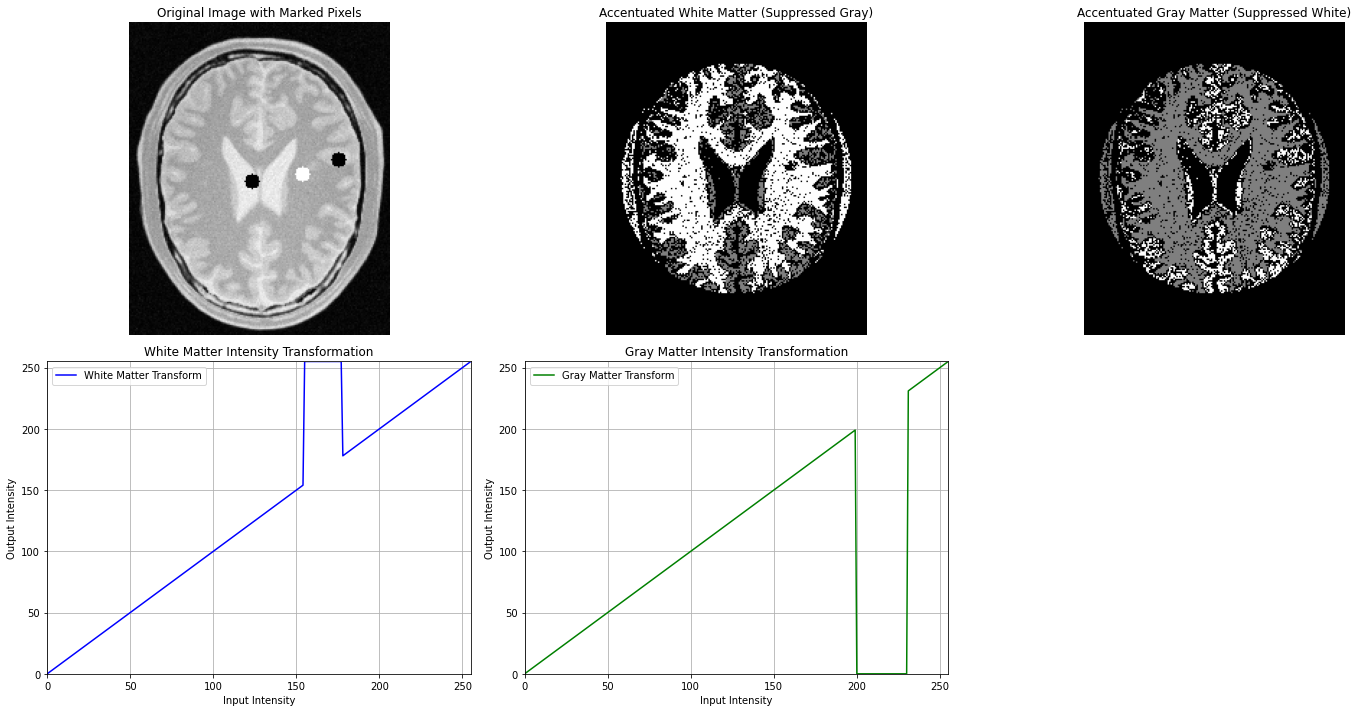

In [46]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the brain proton density image in grayscale
image_path = r'D:\EN3166-Image-processing-and-machine-vision\EN3166-Image-processing-and-machine-vision\Image processing assignment\a1images\brain_proton_density_slice.png'
image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

# Check if the image was loaded successfully
if image is None:
    print(f"Error: Could not load image from path '{image_path}'. Please check the file path.")
else:
    # Specify the coordinates for white matter and gray matter
    white_matter_coords = [(120, 105)]  # Example coordinates for white matter
    gray_matter_coords = [(145, 95)]    # Example coordinates for gray matter
    exclude_gray_coords = [(85, 110)]   # New coordinates to exclude from gray matter

    # Define the percentage range for intensity
    range_percent = 7  # You can adjust this value

    # Function to calculate the intensity range
    def calculate_intensity_range(intensity):
        lower_bound = int(intensity - (intensity * range_percent / 100))
        upper_bound = int(intensity + (intensity * range_percent / 100))
        return lower_bound, upper_bound

    # Get pixel intensities and calculate ranges
    white_matter_intensity = image[white_matter_coords[0][1], white_matter_coords[0][0]]
    gray_matter_intensity = image[gray_matter_coords[0][1], gray_matter_coords[0][0]]
    exclude_gray_intensity = image[exclude_gray_coords[0][1], exclude_gray_coords[0][0]]

    white_range = calculate_intensity_range(white_matter_intensity)
    gray_range = calculate_intensity_range(gray_matter_intensity)
    exclude_gray_range = calculate_intensity_range(exclude_gray_intensity)

    print(f'White Matter Intensity: {white_matter_intensity}, Range: {white_range}')
    print(f'Gray Matter Intensity: {gray_matter_intensity}, Range: {gray_range}')
    print(f'Exclude Intensity: {exclude_gray_intensity}, Range: {exclude_gray_range}')

    # Create masks
    white_mask = (image >= white_range[0]) & (image <= white_range[1])
    gray_mask = (image >= gray_range[0]) & (image <= gray_range[1])
    exclude_mask = (image >= exclude_gray_range[0]) & (image <= exclude_gray_range[1])

    # Create segmented images
    segmented_white = np.zeros_like(image)
    segmented_white[white_mask] = 255  # Highlight the white matter region

    segmented_gray = np.zeros_like(image)
    segmented_gray[gray_mask] = 255  # Highlight the gray matter region
    segmented_gray[exclude_mask] = 0  # Set excluded area to black

    # Create a circular mask to remove the edges
    mask = np.zeros(image.shape, dtype=np.uint8)
    center = (image.shape[1] // 2, image.shape[0] // 2)  # Center of the image
    radius = min(center) - 10  # Adjust radius as needed
    cv.circle(mask, center, radius, 255, thickness=-1)  # Create a filled circle

    # Apply the circular mask to the segmented images
    segmented_white = cv.bitwise_and(segmented_white, segmented_white, mask=mask)
    segmented_gray = cv.bitwise_and(segmented_gray, segmented_gray, mask=mask)

    # Accentuate white matter and suppress gray matter (for second image)
    transformed_white = np.clip(segmented_white * 2, 0, 255).astype(np.uint8)  # Enhance the white matter
    transformed_white_gray_suppressed = np.clip(segmented_gray * 0.5, 0, 255).astype(np.uint8)  # Suppress gray matter

    # Combine both transformations for second image
    transformed_combined_white = cv.addWeighted(transformed_white, 1, transformed_white_gray_suppressed, 1, 0)

    # Accentuate gray matter and suppress white matter (for third image)
    transformed_gray = np.clip(segmented_gray * 2, 0, 255).astype(np.uint8)  # Enhance the gray matter
    transformed_gray_white_suppressed = np.clip(segmented_white * 0.5, 0, 255).astype(np.uint8)  # Suppress white matter

    # Combine both transformations for third image
    transformed_combined_gray = cv.addWeighted(transformed_gray, 1, transformed_gray_white_suppressed, 1, 0)

    # Mark the pixels on the original image for visualization
    cv.circle(image, white_matter_coords[0], 5, (255, 0, 0), -1)  # Mark white matter pixel with a red dot
    cv.circle(image, gray_matter_coords[0], 5, (0, 0, 255), -1)   # Mark gray matter pixel with a blue dot
    cv.circle(image, exclude_gray_coords[0], 5, (0, 255, 0), -1)  # Mark excluded gray matter pixel with a green dot

    # Display the images
    plt.figure(figsize=(20, 10))

    # Display original image with marked pixels
    plt.subplot(2, 3, 1)
    plt.imshow(image, cmap='gray', vmin=0, vmax=255)
    plt.title('Original Image with Marked Pixels')
    plt.axis('off')

    # Display transformed white matter image (enhanced white, suppressed gray)
    plt.subplot(2, 3, 2)
    plt.imshow(transformed_combined_white, cmap='gray', vmin=0, vmax=255)
    plt.title('Accentuated White Matter (Suppressed Gray)')
    plt.axis('off')

    # Display transformed gray matter image (enhanced gray, suppressed white)
    plt.subplot(2, 3, 3)
    plt.imshow(transformed_combined_gray, cmap='gray', vmin=0, vmax=255)
    plt.title('Accentuated Gray Matter (Suppressed White)')
    plt.axis('off')

    # Intensity transformation function graph for white matter
    plt.subplot(2, 3, 4)
    t_white = np.zeros(256, dtype=np.uint8)
    for i in range(256):
        if i <= white_range[0]:
            t_white[i] = i  # Identity for low values
        elif i <= white_range[1]:
            t_white[i] = 255  # Max for the white matter range
        else:
            t_white[i] = i  # Identity for high values
    plt.plot(t_white, label='White Matter Transform', color='blue')
    plt.title('White Matter Intensity Transformation')
    plt.xlabel('Input Intensity')
    plt.ylabel('Output Intensity')
    plt.xlim(0, 255)
    plt.ylim(0, 255)
    plt.grid()
    plt.legend()

    # Intensity transformation function graph for gray matter
    plt.subplot(2, 3, 5)
    t_gray = np.zeros(256, dtype=np.uint8)
    for i in range(256):
        if i <= gray_range[0]:
            t_gray[i] = i  # Identity for low values
        elif i <= gray_range[1]:
            t_gray[i] = 0  # Set to 0 for gray matter range (optional)
        else:
            t_gray[i] = i  # Identity for high values
    plt.plot(t_gray, label='Gray Matter Transform', color='green')
    plt.title('Gray Matter Intensity Transformation')
    plt.xlabel('Input Intensity')
    plt.ylabel('Output Intensity')
    plt.xlim(0, 255)
    plt.ylim(0, 255)
    plt.grid()
    plt.legend()

    plt.tight_layout()
    plt.show()


White Matter Intensity: 166, Range: (154, 177)
Gray Matter Intensity: 215, Range: (199, 230)
Exclude Intensity: 231, Range: (214, 247)


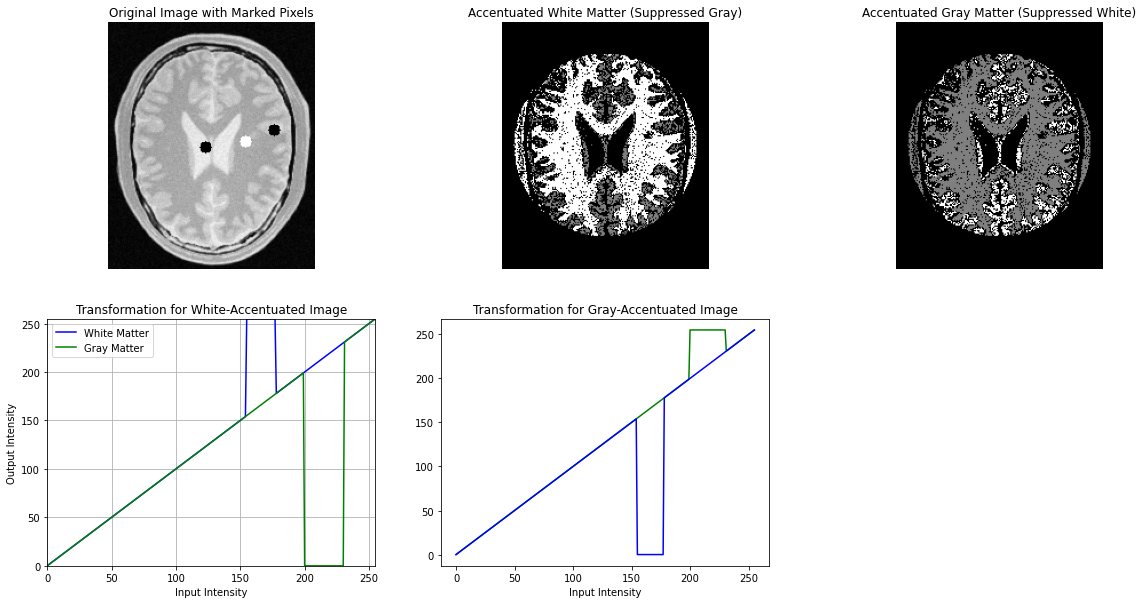

In [47]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the brain proton density image in grayscale
image_path = r'D:\EN3166-Image-processing-and-machine-vision\EN3166-Image-processing-and-machine-vision\Image processing assignment\a1images\brain_proton_density_slice.png'
image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

# Check if the image was loaded successfully
if image is None:
    print(f"Error: Could not load image from path '{image_path}'. Please check the file path.")
else:
    # Specify the coordinates for white matter and gray matter
    white_matter_coords = [(120, 105)]  # Example coordinates for white matter
    gray_matter_coords = [(145, 95)]    # Example coordinates for gray matter
    exclude_gray_coords = [(85, 110)]   # New coordinates to exclude from gray matter

    # Define the percentage range for intensity
    range_percent = 7  # You can adjust this value

    # Function to calculate the intensity range
    def calculate_intensity_range(intensity):
        lower_bound = int(intensity - (intensity * range_percent / 100))
        upper_bound = int(intensity + (intensity * range_percent / 100))
        return lower_bound, upper_bound

    # Get pixel intensities and calculate ranges
    white_matter_intensity = image[white_matter_coords[0][1], white_matter_coords[0][0]]
    gray_matter_intensity = image[gray_matter_coords[0][1], gray_matter_coords[0][0]]
    exclude_gray_intensity = image[exclude_gray_coords[0][1], exclude_gray_coords[0][0]]

    white_range = calculate_intensity_range(white_matter_intensity)
    gray_range = calculate_intensity_range(gray_matter_intensity)
    exclude_gray_range = calculate_intensity_range(exclude_gray_intensity)

    print(f'White Matter Intensity: {white_matter_intensity}, Range: {white_range}')
    print(f'Gray Matter Intensity: {gray_matter_intensity}, Range: {gray_range}')
    print(f'Exclude Intensity: {exclude_gray_intensity}, Range: {exclude_gray_range}')

    # Create masks
    white_mask = (image >= white_range[0]) & (image <= white_range[1])
    gray_mask = (image >= gray_range[0]) & (image <= gray_range[1])
    exclude_mask = (image >= exclude_gray_range[0]) & (image <= exclude_gray_range[1])

    # Create segmented images
    segmented_white = np.zeros_like(image)
    segmented_white[white_mask] = 255  # Highlight the white matter region

    segmented_gray = np.zeros_like(image)
    segmented_gray[gray_mask] = 255  # Highlight the gray matter region
    segmented_gray[exclude_mask] = 0  # Set excluded area to black

    # Create a circular mask to remove the edges
    mask = np.zeros(image.shape, dtype=np.uint8)
    center = (image.shape[1] // 2, image.shape[0] // 2)  # Center of the image
    radius = min(center) - 10  # Adjust radius as needed
    cv.circle(mask, center, radius, 255, thickness=-1)  # Create a filled circle

    # Apply the circular mask to the segmented images
    segmented_white = cv.bitwise_and(segmented_white, segmented_white, mask=mask)
    segmented_gray = cv.bitwise_and(segmented_gray, segmented_gray, mask=mask)

    # Accentuate white matter and suppress gray matter (for second image)
    transformed_white = np.clip(segmented_white * 2, 0, 255).astype(np.uint8)  # Enhance the white matter
    transformed_white_gray_suppressed = np.clip(segmented_gray * 0.5, 0, 255).astype(np.uint8)  # Suppress gray matter

    # Combine both transformations for second image
    transformed_combined_white = cv.addWeighted(transformed_white, 1, transformed_white_gray_suppressed, 1, 0)

    # Accentuate gray matter and suppress white matter (for third image)
    transformed_gray = np.clip(segmented_gray * 2, 0, 255).astype(np.uint8)  # Enhance the gray matter
    transformed_gray_white_suppressed = np.clip(segmented_white * 0.5, 0, 255).astype(np.uint8)  # Suppress white matter

    # Combine both transformations for third image
    transformed_combined_gray = cv.addWeighted(transformed_gray, 1, transformed_gray_white_suppressed, 1, 0)

    # Mark the pixels on the original image for visualization
    cv.circle(image, white_matter_coords[0], 5, (255, 0, 0), -1)  # Mark white matter pixel with a red dot
    cv.circle(image, gray_matter_coords[0], 5, (0, 0, 255), -1)   # Mark gray matter pixel with a blue dot
    cv.circle(image, exclude_gray_coords[0], 5, (0, 255, 0), -1)  # Mark excluded gray matter pixel with a green dot

    # Display the images
    plt.figure(figsize=(20, 10))

    # Display original image with marked pixels
    plt.subplot(2, 3, 1)
    plt.imshow(image, cmap='gray', vmin=0, vmax=255)
    plt.title('Original Image with Marked Pixels')
    plt.axis('off')

    # Display transformed white matter image (enhanced white, suppressed gray)
    plt.subplot(2, 3, 2)
    plt.imshow(transformed_combined_white, cmap='gray', vmin=0, vmax=255)
    plt.title('Accentuated White Matter (Suppressed Gray)')
    plt.axis('off')

    # Display transformed gray matter image (enhanced gray, suppressed white)
    plt.subplot(2, 3, 3)
    plt.imshow(transformed_combined_gray, cmap='gray', vmin=0, vmax=255)
    plt.title('Accentuated Gray Matter (Suppressed White)')
    plt.axis('off')

    # Intensity transformation function graph for the second image
    plt.subplot(2, 3, 4)
    t_white = np.zeros(256, dtype=np.uint8)
    t_gray = np.zeros(256, dtype=np.uint8)
    
    # White matter enhanced, gray matter suppressed
    for i in range(256):
        if i <= white_range[0]:
            t_white[i] = i  # Identity for low values
        elif i <= white_range[1]:
            t_white[i] = 255  # Max for the white matter range
        else:
            t_white[i] = i  # Identity for high values
        
        if i <= gray_range[0]:
            t_gray[i] = i  # Identity for low values
        elif i <= gray_range[1]:
            t_gray[i] = 0  # Suppress gray matter
        else:
            t_gray[i] = i  # Identity for high values

    plt.plot(t_white, label='White Matter', color='blue')
    plt.plot(t_gray, label='Gray Matter', color='green')
    plt.title('Transformation for White-Accentuated Image')
    plt.xlabel('Input Intensity')
    plt.ylabel('Output Intensity')
    plt.xlim(0, 255)
    plt.ylim(0, 255)
    plt.grid()
    plt.legend()

    # Intensity transformation function graph for the third image
    plt.subplot(2, 3, 5)
    t_white_suppressed = np.zeros(256, dtype=np.uint8)
    t_gray_accentuated = np.zeros(256, dtype=np.uint8)

    # Gray matter enhanced, white matter suppressed
    for i in range(256):
        if i <= gray_range[0]:
            t_gray_accentuated[i] = i  # Identity for low values
        elif i <= gray_range[1]:
            t_gray_accentuated[i] = 255  # Max for gray matter range
        else:
            t_gray_accentuated[i] = i  # Identity for high values
        
        if i <= white_range[0]:
            t_white_suppressed[i] = i  # Identity for low values
        elif i <= white_range[1]:
            t_white_suppressed[i] = 0  # Suppress white matter
        else:
            t_white_suppressed[i] = i  # Identity for high values

    plt.plot(t_gray_accentuated, label='Gray Matter', color='green')
    plt.plot(t_white_suppressed, label='White Matter', color='blue')
    plt.title('Transformation for Gray-Accentuated Image')
    plt.xlabel('Input Intensity')
    plt.ylabel


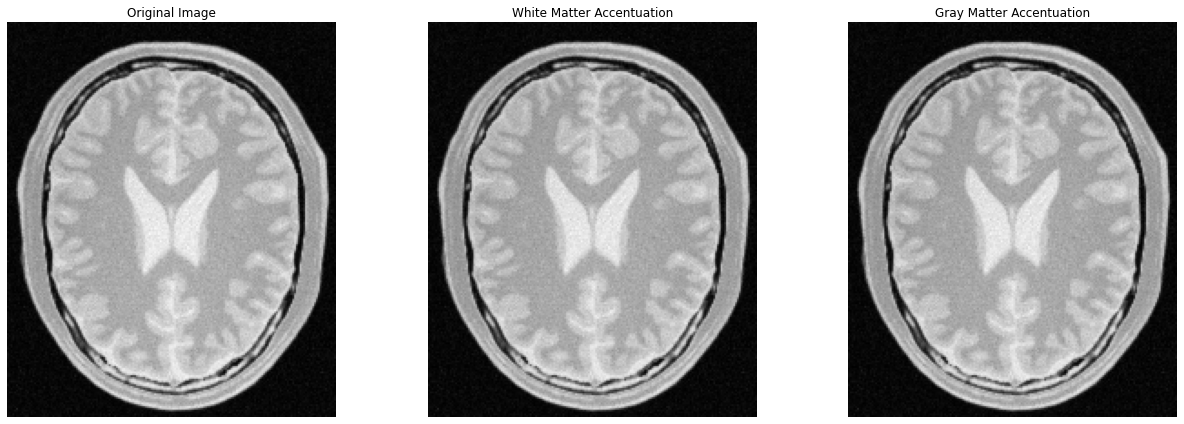

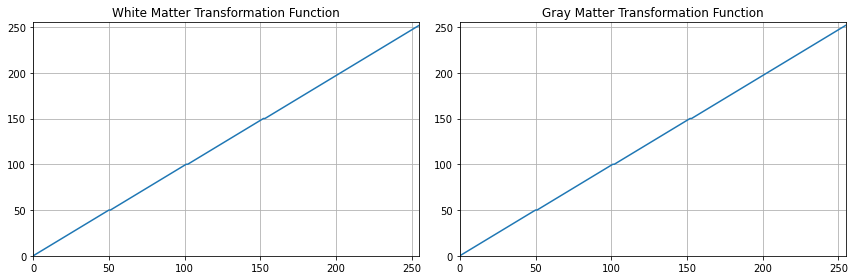

In [63]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the brain proton density image in grayscale
image_path = r'D:\EN3166-Image-processing-and-machine-vision\EN3166-Image-processing-and-machine-vision\Image processing assignment\a1images\brain_proton_density_slice.png'
image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

# Check if the image was loaded successfully
if image is None:
    print(f"Error: Could not load image from path '{image_path}'. Please check the file path.")
else:
    # Define the intensity transformation based on the previously generated graphs for white matter accentuation
    white_acc_t1 = np.linspace(0, 50, 51).astype('uint8')     # Low to mid
    white_acc_t2 = np.linspace(50, 100, 100 - 50 + 1).astype('uint8')  # Mid to upper mid
    white_acc_t3 = np.linspace(100, 150, 150 - 100 + 1).astype('uint8')  # Upper mid to high
    white_acc_t4 = np.linspace(150, 255, 255 - 150 + 1).astype('uint8')  # Rounding off at high
    white_acc_transform = np.concatenate((white_acc_t1, white_acc_t2, white_acc_t3, white_acc_t4))
# t1 = np.linspace(0, c[0, 1], c[0, 0] + 1).astype('uint8')   
# t2 = np.linspace(c[0, 1], c[1, 1], c[1, 0] - c[0, 0]).astype('uint8') 
# t3 = np.linspace(c[1, 1], c[2, 1], c[2, 0] - c[1, 0]).astype('uint8')  
# t4 = np.linspace(c[2, 1], c[3, 1], c[3, 0] - c[2, 0]).astype('uint8')  
# t5 = np.linspace(c[3, 1], 255, 255 - c[3, 0]).astype('uint8')  


    # Define the intensity transformation based on the previously generated graphs for gray matter accentuation
    gray_acc_t1 = np.linspace(0, 50, 51).astype('uint8')     # Low to mid
    gray_acc_t2 = np.linspace(50, 100, 100 - 50 + 1).astype('uint8')  # Mid to upper mid
    gray_acc_t3 = np.linspace(100, 150, 150 - 100 + 1).astype('uint8')  # Upper mid to high
    gray_acc_t4 = np.linspace(150, 255, 255 - 150 + 1).astype('uint8')  # Complete range to 255
    gray_acc_transform = np.concatenate((gray_acc_t1, gray_acc_t2, gray_acc_t3, gray_acc_t4))

    # Apply the transformation for white matter accentuation
    white_accentuated_image = white_acc_transform[image]

    # Apply the transformation for gray matter accentuation
    gray_accentuated_image = gray_acc_transform[image]

    # Display the original image, white matter accentuated, and gray matter accentuated images
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))

    # Original image
    ax[0].imshow(image, cmap='gray', vmin=0, vmax=255)
    ax[0].set_title('Original Image')
    ax[0].axis('off')

    # White matter accentuated image
    ax[1].imshow(white_accentuated_image, cmap='gray', vmin=0, vmax=255)
    ax[1].set_title('White Matter Accentuation')
    ax[1].axis('off')

    # Gray matter accentuated image
    ax[2].imshow(gray_accentuated_image, cmap='gray', vmin=0, vmax=255)
    ax[2].set_title('Gray Matter Accentuation')
    ax[2].axis('off')

    plt.tight_layout()
    plt.show()

    # Plot the transformation functions for both accentuations
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    # White matter transformation function
    ax[0].plot(white_acc_transform)
    ax[0].set_ylim([0, 255])
    ax[0].set_xlim([0, 255])
    ax[0].set_title('White Matter Transformation Function')
    ax[0].grid(True)

    # Gray matter transformation function
    ax[1].plot(gray_acc_transform)
    ax[1].set_ylim([0, 255])
    ax[1].set_xlim([0, 255])
    ax[1].set_title('Gray Matter Transformation Function')
    ax[1].grid(True)

    plt.tight_layout()
    plt.show()


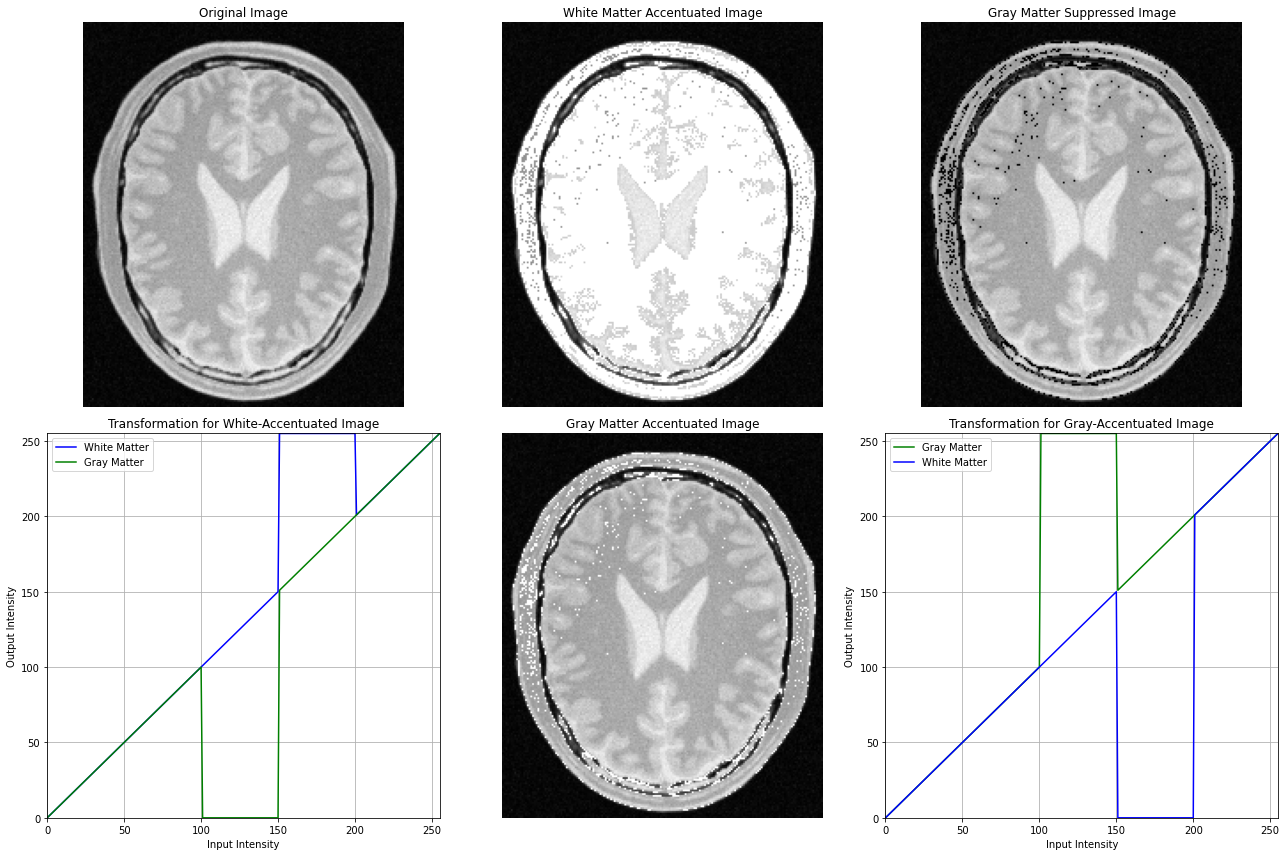

In [52]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = r'D:\EN3166-Image-processing-and-machine-vision\EN3166-Image-processing-and-machine-vision\Image processing assignment\a1images\brain_proton_density_slice.png'
image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

# Define the intensity ranges for white and gray matter based on the transformation graphs
white_range = [150, 200]  # Approximate white matter range from the graph
gray_range = [100, 150]   # Approximate gray matter range from the graph

# Initialize transformation functions
t_white = np.zeros(256, dtype=np.uint8)
t_gray = np.zeros(256, dtype=np.uint8)

# White matter enhanced, gray matter suppressed
for i in range(256):
    if i <= white_range[0]:
        t_white[i] = i  # Identity for low values
    elif i <= white_range[1]:
        t_white[i] = 255  # Max for the white matter range
    else:
        t_white[i] = i  # Identity for high values
    
    if i <= gray_range[0]:
        t_gray[i] = i  # Identity for low values
    elif i <= gray_range[1]:
        t_gray[i] = 0  # Suppress gray matter
    else:
        t_gray[i] = i  # Identity for high values

# Apply the white-accentuated transformation
white_accentuated_image = t_white[image]
gray_suppressed_image = t_gray[image]

# Create the second set of transformations for gray-accentuated image
t_white_suppressed = np.zeros(256, dtype=np.uint8)
t_gray_accentuated = np.zeros(256, dtype=np.uint8)

# Gray matter enhanced, white matter suppressed
for i in range(256):
    if i <= gray_range[0]:
        t_gray_accentuated[i] = i  # Identity for low values
    elif i <= gray_range[1]:
        t_gray_accentuated[i] = 255  # Max for gray matter range
    else:
        t_gray_accentuated[i] = i  # Identity for high values
    
    if i <= white_range[0]:
        t_white_suppressed[i] = i  # Identity for low values
    elif i <= white_range[1]:
        t_white_suppressed[i] = 0  # Suppress white matter
    else:
        t_white_suppressed[i] = i  # Identity for high values

# Apply the gray-accentuated transformation
gray_accentuated_image = t_gray_accentuated[image]
white_suppressed_image = t_white_suppressed[image]

# Plot the transformations and the transformed images
fig, ax = plt.subplots(2, 3, figsize=(18, 12))

# Original image
ax[0, 0].imshow(image, cmap='gray', vmin=0, vmax=255)
ax[0, 0].set_title('Original Image')
ax[0, 0].axis('off')

# White-accentuated image
ax[0, 1].imshow(white_accentuated_image, cmap='gray', vmin=0, vmax=255)
ax[0, 1].set_title('White Matter Accentuated Image')
ax[0, 1].axis('off')

# Gray-suppressed image
ax[0, 2].imshow(gray_suppressed_image, cmap='gray', vmin=0, vmax=255)
ax[0, 2].set_title('Gray Matter Suppressed Image')
ax[0, 2].axis('off')

# Transformation function for the white-accentuated image
ax[1, 0].plot(t_white, label='White Matter', color='blue')
ax[1, 0].plot(t_gray, label='Gray Matter', color='green')
ax[1, 0].set_title('Transformation for White-Accentuated Image')
ax[1, 0].set_xlabel('Input Intensity')
ax[1, 0].set_ylabel('Output Intensity')
ax[1, 0].set_xlim(0, 255)
ax[1, 0].set_ylim(0, 255)
ax[1, 0].grid()
ax[1, 0].legend()

# Gray-accentuated image
ax[1, 1].imshow(gray_accentuated_image, cmap='gray', vmin=0, vmax=255)
ax[1, 1].set_title('Gray Matter Accentuated Image')
ax[1, 1].axis('off')

# Transformation function for the gray-accentuated image
ax[1, 2].plot(t_gray_accentuated, label='Gray Matter', color='green')
ax[1, 2].plot(t_white_suppressed, label='White Matter', color='blue')
ax[1, 2].set_title('Transformation for Gray-Accentuated Image')
ax[1, 2].set_xlabel('Input Intensity')
ax[1, 2].set_ylabel('Output Intensity')
ax[1, 2].set_xlim(0, 255)
ax[1, 2].set_ylim(0, 255)
ax[1, 2].grid()
ax[1, 2].legend()

plt.tight_layout()
plt.show()
